<a href="https://colab.research.google.com/github/JonathanJuradoS/Clusttering/blob/main/Pedidos_Geolocalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso: Pedidos Geolocalizados
**Descripción:** Una empresa de delivery quiere agrupar pedidos por ubicación GPS.

**Objetivo:** Detectar zonas de alta demanda.

**Diccionario de datos:**
- `longitude`: Coordenada geográfica este-oeste.
- `latitude`: Coordenada geográfica norte-sur.

## Paso 1: Carga de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("/content/Pedidos_Geolocalizados.csv")
df.head()

,longitude,latitude
0,-77.042546,-12.050184
1,-77.010626,-11.819714
2,-76.858181,-11.907202
3,-77.063998,-11.960537
4,-76.852140,-12.137593


## Paso 2: Preprocesamiento

In [2]:
# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(df)

## Paso 3: Clustering con DBSCAN

In [3]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
df['DBSCAN'] = labels_dbscan

## Paso 4: Clustering con Mean-Shift

In [4]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels_ms = ms.fit_predict(X)
df['MeanShift'] = labels_ms

## Paso 5: Visualización de Resultados

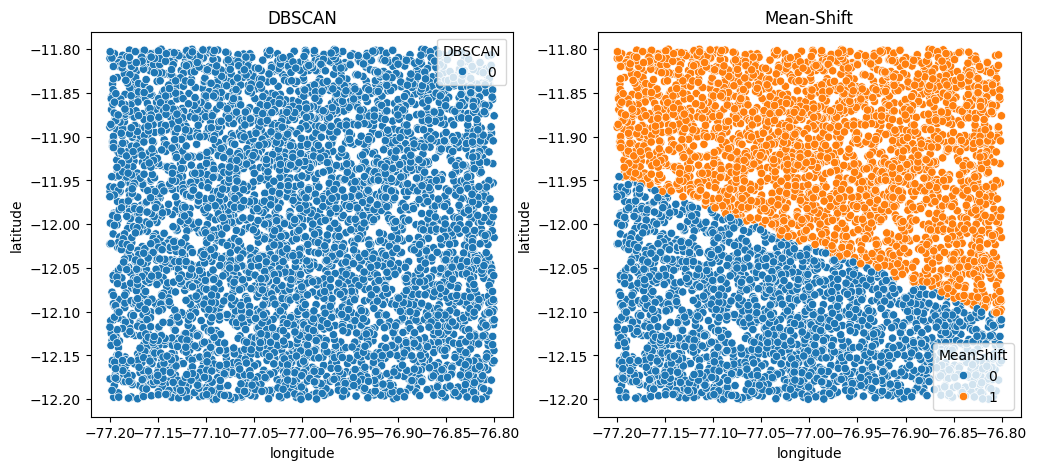

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['DBSCAN'], palette='tab10')
plt.title("DBSCAN")

plt.subplot(1,2,2)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['MeanShift'], palette='tab10')
plt.title("Mean-Shift")
plt.show()

## Paso 6: Evaluación con Silhouette Score

In [6]:
def safe_silhouette(X, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return silhouette_score(X, labels) if n_clusters > 1 else -1

score_dbscan = safe_silhouette(X, df['DBSCAN'])
score_meanshift = safe_silhouette(X, df['MeanShift'])

print(f"Silhouette DBSCAN: {score_dbscan:.4f}")
print(f"Silhouette Mean-Shift: {score_meanshift:.4f}")

Silhouette DBSCAN: -1.0000
Silhouette Mean-Shift: 0.3390


## Paso 7: Conclusiones

In [7]:
if score_dbscan > score_meanshift:
    print("DBSCAN obtuvo un mejor desempeño en este caso.")
elif score_meanshift > score_dbscan:
    print("Mean-Shift obtuvo un mejor desempeño en este caso.")
else:
    print("Ambos algoritmos obtuvieron resultados similares o no fueron efectivos.")

Mean-Shift obtuvo un mejor desempeño en este caso.


## Evaluación de Modelos

- **Silhouette DBSCAN**: `-1.0000`  
  El valor negativo indica que el modelo DBSCAN no pudo formar clústeres válidos. Esto puede deberse a parámetros inadecuados o a que los datos no tienen densidades marcadas. En este caso, DBSCAN consideró todos los puntos como parte de un único grupo o como ruido.

- **Silhouette Mean-Shift**: `0.3390`  
  Este valor es moderadamente positivo, lo que sugiere que Mean-Shift logró formar clústeres con una estructura razonable. Aunque no es un valor alto, es significativamente mejor que el obtenido por DBSCAN en este caso.

**Conclusión**: El algoritmo **Mean-Shift** tuvo un mejor desempeño para este conjunto de datos.
